In [ ]:
import random
import math

def monte_carlo_circle(radius, num_points):
    count = 0
    for i in range(num_points):
        x = random.uniform(-radius, radius)
        y = random.uniform(-radius, radius)
        if math.sqrt(x**2 + y**2) <= radius:
            count += 1
    return (4 * count) / num_points

print(monte_carlo_circle(1, 100000))

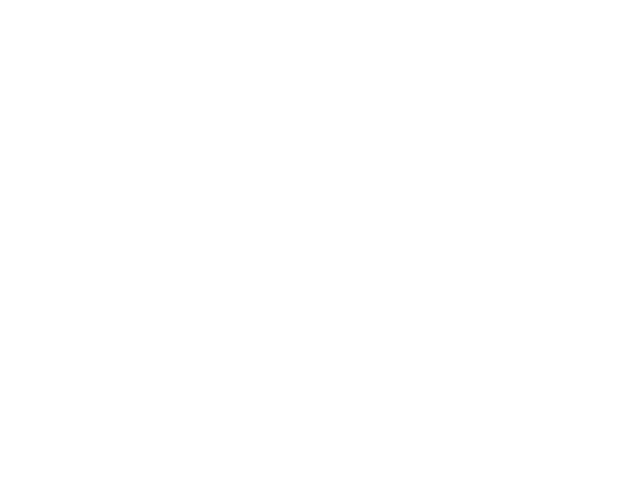

In [2]:
import random
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib widget
%matplotlib widget

# Define the circle radius and center coordinates
RADIUS = 100
CENTER_X = 0
CENTER_Y = 0

# Define the number of locations to visit
NUM_LOCATIONS = 100

# Generate the locations randomly within the circle
locations = []
for i in range(NUM_LOCATIONS):
    # Generate random x and y coordinates within the circle
    r = RADIUS * math.sqrt(random.uniform(0, 1))
    theta = random.uniform(0, 2*math.pi)
    x = CENTER_X + r * math.cos(theta)
    y = CENTER_Y + r * math.sin(theta)
    locations.append((x, y))

# Define the Monte Carlo search function
def monte_carlo_search(locations):
    # Define the starting location as the center of the circle
    current_location = (CENTER_X, CENTER_Y)
    path = [current_location]

    # Loop over the remaining locations
    for i in range(NUM_LOCATIONS - 1):
        # Calculate the distances from the current location to all remaining locations
        distances = [math.sqrt((x - current_location[0])**2 + (y - current_location[1])**2) for x, y in locations[i+1:]]

        # Use Monte Carlo to randomly select the next location to visit
        probabilities = [1/d for d in distances]
        probabilities_sum = sum(probabilities)
        probabilities_normalized = [p/probabilities_sum for p in probabilities]
        next_location_index = random.choices(range(len(distances)), weights=probabilities_normalized)[0]
        next_location = locations[next_location_index+i+1]
        path.append(next_location)
        current_location = next_location

    return path

# Define the animation function
def animate(i):
    global ax
    ax.clear()
    ax.set_xlim(-RADIUS - 1, RADIUS + 1)
    ax.set_ylim(-RADIUS - 1, RADIUS + 1)
    path = monte_carlo_search(locations[:i+1])
    x, y = zip(*path)
    ax.scatter(x, y, c='r')
    ax.add_patch(plt.Circle((CENTER_X, CENTER_Y), RADIUS, color='b', fill=False))
    ax.set_title(f"Monte Carlo Method: {i+1} of {NUM_LOCATIONS} locations visited")


# Set up the animation
fig = plt.figure()
ani = animation.FuncAnimation(fig, animate, frames=NUM_LOCATIONS-1, interval=100)

# Show the animation
plt.show()
